In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
filename = "C:/Users/Bin/Documents/Datasets/KDD99/kddcup.data_10_percent_corrected"
chunksize = 10000

count = 0
buffer = []
for chunk in pd.read_csv(filename,names=None, chunksize=chunksize):
    if count == 8:
        break
    count += 1
    buffer.append(chunk)
data = pd.concat(buffer).reset_index(drop=True)
del buffer

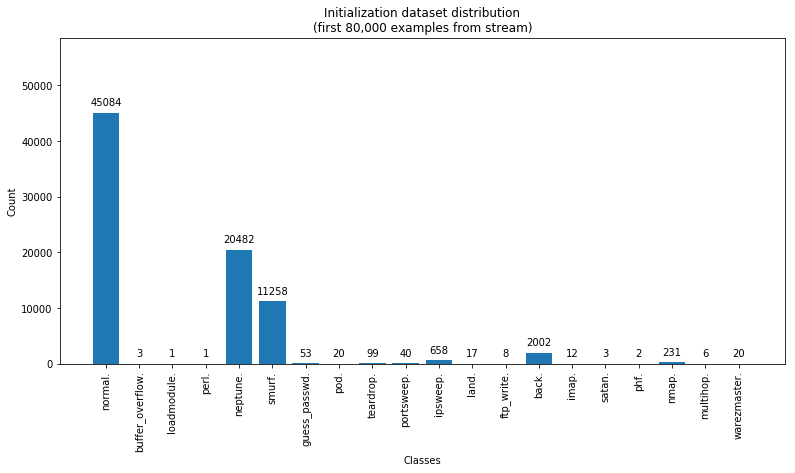

In [20]:
classes = data.iloc[:,-1].unique()
labels = []
count = []
for c in classes:
    labels.append(c)
    count.append(list(data.iloc[:,-1]).count(c))
#  print(c," : ",list(data.iloc[:,-1]).count(c))
fig, ax = plt.subplots(1,1,figsize=(13,6))
ax.bar(range(len(labels)),count)
ax.set_xticklabels(labels,rotation="vertical")
ax.set_xticks(range(len(labels)))
ax.set_title("Initialization dataset distribution\n(first 80,000 examples from stream)")
ax.set_xlabel("Classes")
ax.set_ylabel("Count")
ax.set_ylim([0,max(count)*1.3])
rects = ax.patches
for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    ax.annotate(y_value, (x_value, y_value), xytext=(0, 5), textcoords="offset points", 
        ha='center', va='bottom')
    
plt.show()

In [21]:

data.to_csv("C:/Users/Bin/Documents/Datasets/KDD99/80000_10_percent_kdd.csv",header=None,index=None)
del data